In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold


df = pd.read_csv('../data/stratified_valid.csv')

In [3]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Число групп, на которые поделим диапазон значений таргета
N = 10 

# StratifiedKFold умеет работать только с дискретными/целыми значениями.
# Поэтому делим таргет на N групп 
df['target_reg_group'] = pd.qcut(df['target_reg'], N, labels = [f'group_{i}' for i in range(N)])

# Теперь можно применить StratifiedKFold 
skf = StratifiedKFold(n_splits=N, shuffle = True)
y = df['target_reg_group']
df['num_fold'] = None

for i, (train_index, test_index) in enumerate(skf.split(df, df['target_reg_group'])):
    print(f'{i} | test: {test_index}, train: {train_index}\n\n')
    df.loc[test_index, ['num_fold']] = i

0 | test: [   3    7   19   21   52   60   63   68   73   74   78   93  106  108
  114  118  152  176  182  192  193  195  208  210  216  219  225  240
  245  260  266  273  290  311  323  324  326  334  350  370  377  389
  395  406  411  429  439  451  454  458  469  476  502  510  532  541
  543  548  553  559  563  567  575  606  608  609  618  642  651  656
  676  680  694  699  701  706  716  734  743  748  759  769  787  802
  813  816  817  821  822  840  866  868  871  892  908  942  950  965
  989  994  997 1004 1012 1013 1019 1022 1067 1073 1079 1082 1095 1108
 1110 1113 1123 1146 1153 1156 1157 1166 1181 1193 1218 1225 1226 1230
 1231 1235 1238 1253 1266 1269 1273 1291 1295 1299 1316 1321 1323 1330
 1340 1355 1362 1371 1380 1384 1395 1407 1409 1416 1420 1431 1447 1452
 1474 1475 1484 1485 1495 1504 1534 1544 1547 1569 1571 1596 1639 1640
 1644 1652 1671 1672 1673 1676 1689 1723 1790 1802 1804 1805 1809 1825
 1830 1833 1838 1840 1875 1876 1878 1886 1925 1944 1945 1953 1973 1

In [4]:
df = df.drop('target_reg_group', axis=1, errors='ignore')
df.to_csv('../data/stratified_valid.csv', index=False)
df

,car_id,target_reg,num_fold
0,y13744087j,9492.96,6
1,O41613818T,2656.23,2
2,d-2109686j,1526.11,1
3,u29695600e,1338.00,0
4,N-8915870N,825.72,7
...,...,...,...
2332,j21246192N,547.30,8
2333,h-1554287F,26414.19,3
2334,A15262612g,2677.95,0
2335,W-2514493U,2213.63,4


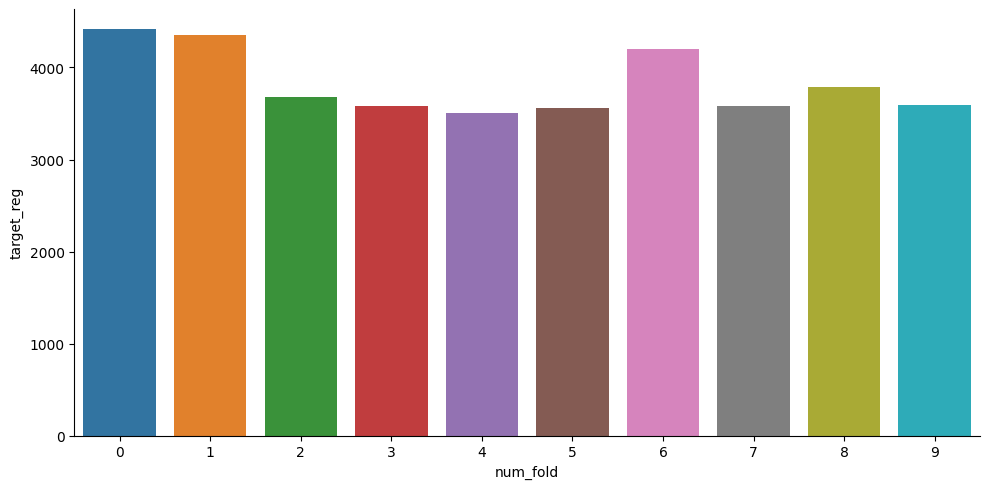

In [5]:
import seaborn as sns

tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

In [6]:
!pip3 install iterative-stratification

In [7]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779913/multi_label.csv')

In [8]:
df

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3819,1,0,0,0,0,0,0,0,0,0,0,0
9996,3817,0,1,0,0,0,0,1,0,0,0,0,1
9997,3816,1,0,0,0,0,0,0,0,0,1,0,0
9998,3814,0,1,0,0,0,0,0,0,0,1,0,1


In [9]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import numpy as np


df['kfold'] = None
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=7575)
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']

X = df['ID']
y = df[targets]

for i, (train_index, test_index) in enumerate(mskf.split(X, y)):
    print(f'{i} | test: {test_index}, train: {train_index}\n\n')
    df.loc[test_index, ['kfold']] = i

0 | test: [   9   13   17 ... 9984 9989 9998], train: [   0    1    2 ... 9996 9997 9999]


1 | test: [   6   10   11 ... 9983 9985 9991], train: [   0    1    2 ... 9997 9998 9999]


2 | test: [   0    1    2 ... 9988 9992 9999], train: [   5    6    8 ... 9996 9997 9998]


3 | test: [   5   14   16 ... 9993 9994 9997], train: [   0    1    2 ... 9996 9998 9999]


4 | test: [   8   19   33 ... 9981 9995 9996], train: [   0    1    2 ... 9997 9998 9999]




In [10]:
df

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science,kfold
0,9431,1,0,1,1,0,0,0,0,0,0,0,0,2
1,7960,1,1,0,1,0,0,0,0,0,0,0,1,2
2,8578,1,1,0,1,0,0,0,0,0,1,0,0,2
3,1651,1,0,1,1,0,0,0,0,0,0,0,0,2
4,4011,1,0,1,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3819,1,0,0,0,0,0,0,0,0,0,0,0,4
9996,3817,0,1,0,0,0,0,1,0,0,0,0,1,4
9997,3816,1,0,0,0,0,0,0,0,0,1,0,0,3
9998,3814,0,1,0,0,0,0,0,0,0,1,0,1,0


In [11]:
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']
tmp = df.groupby(['kfold'], as_index=False).sum()  
tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
print(tmp_melt.groupby(['class'], as_index=False).std()['count'].mean())

0.340021131168808


In [12]:
df.to_csv('../data/multi_label_kfold.csv', index=False)